In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=['PassengerId'])
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['C','Q','S'],[0,1,2],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [6]:
df['Embarked'].fillna(method='ffill',inplace = True)
df['Age'] = (df['Age'].ffill() + df['Age'].bfill())/2

In [7]:
ticket_arr = np.zeros((df.shape[0]))
for i in range(df['Ticket'].shape[0]):
    str_list = df.iloc[i,8].split()
    try:
        ticket_arr[i] = float(str_list[-1])
    except:
        ticket_arr[i] = np.NaN
df['Ticket'] = pd.Series(ticket_arr)
df['Ticket'] = (df['Ticket'].ffill() + df['Ticket'].bfill())/2
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,21171.0,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,17599.0,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,3101282.0,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803.0,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450.0,8.0500,NaN,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.726061,0.523008,0.381594,2.978099e+05,32.204208,1.533109
std,257.353842,0.486592,0.836071,0.477990,13.883103,1.102743,0.806057,6.561971e+05,49.693429,0.793069
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,1.487900e+04,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.500000,0.000000,0.000000,1.130280e+05,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,3.470820e+05,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,3.101317e+06,512.329200,2.000000


In [10]:
numerical_features = ['Age','SibSp','Parch','Fare','Ticket']
categorical_features = ['Survived','Pclass','Sex','Embarked']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/ipykern

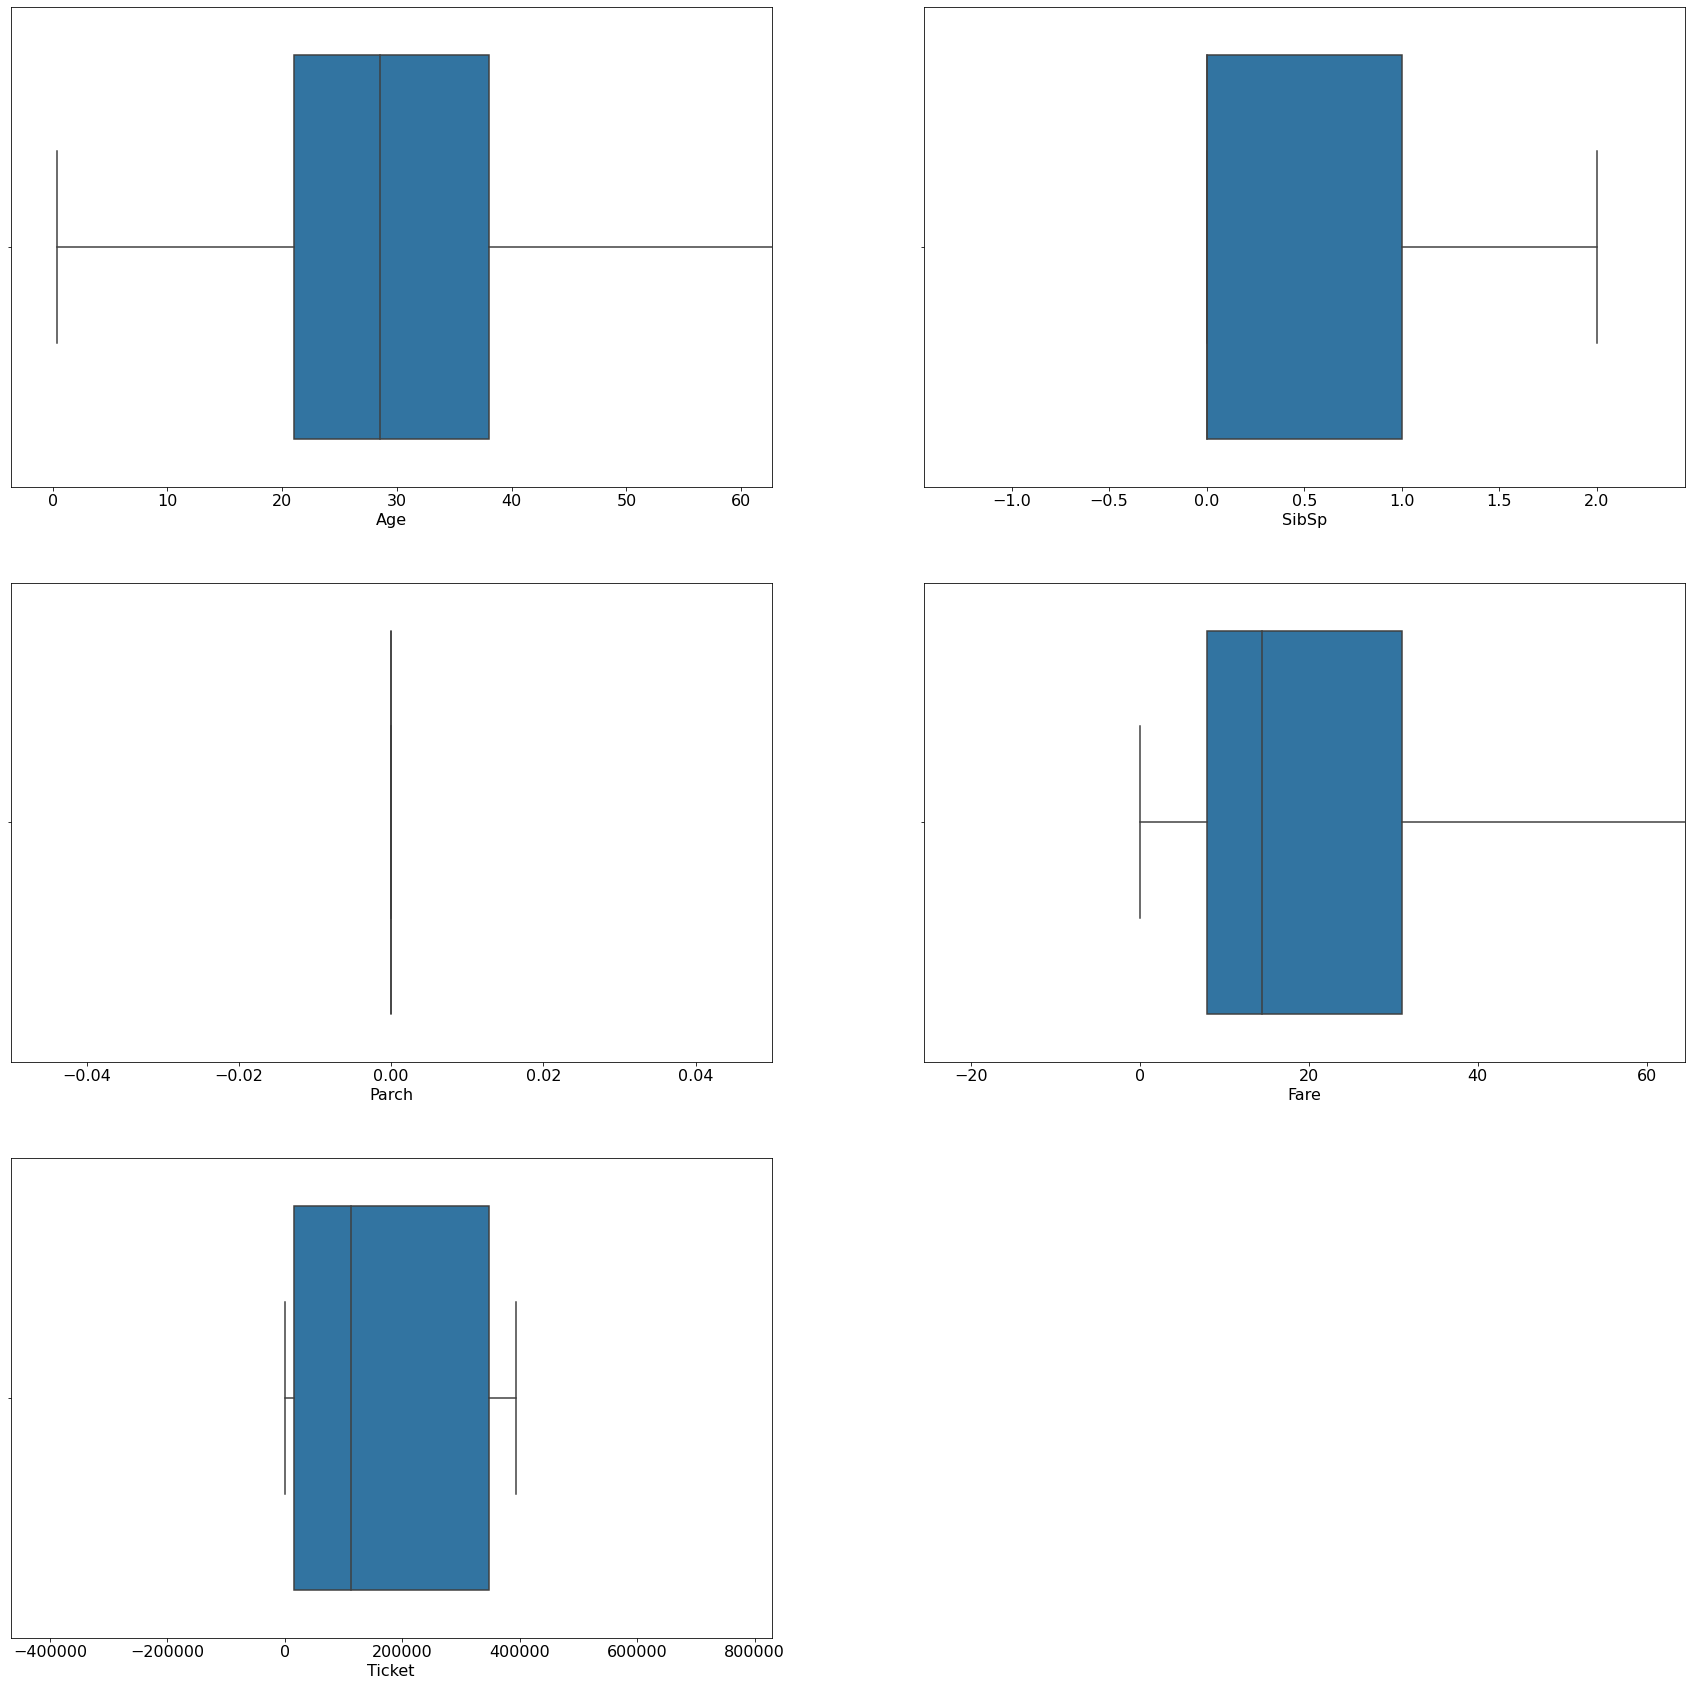

In [11]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(30,30))
i = 1
for col in numerical_features:
    plt.subplot(3,2,i)
    i = i + 1
    ax = sns.boxplot(df[col])
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    ax.set_xlim([df[col].quantile(0.25) - 1.45*IQR,df[col].quantile(0.75) + 1.45*IQR])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

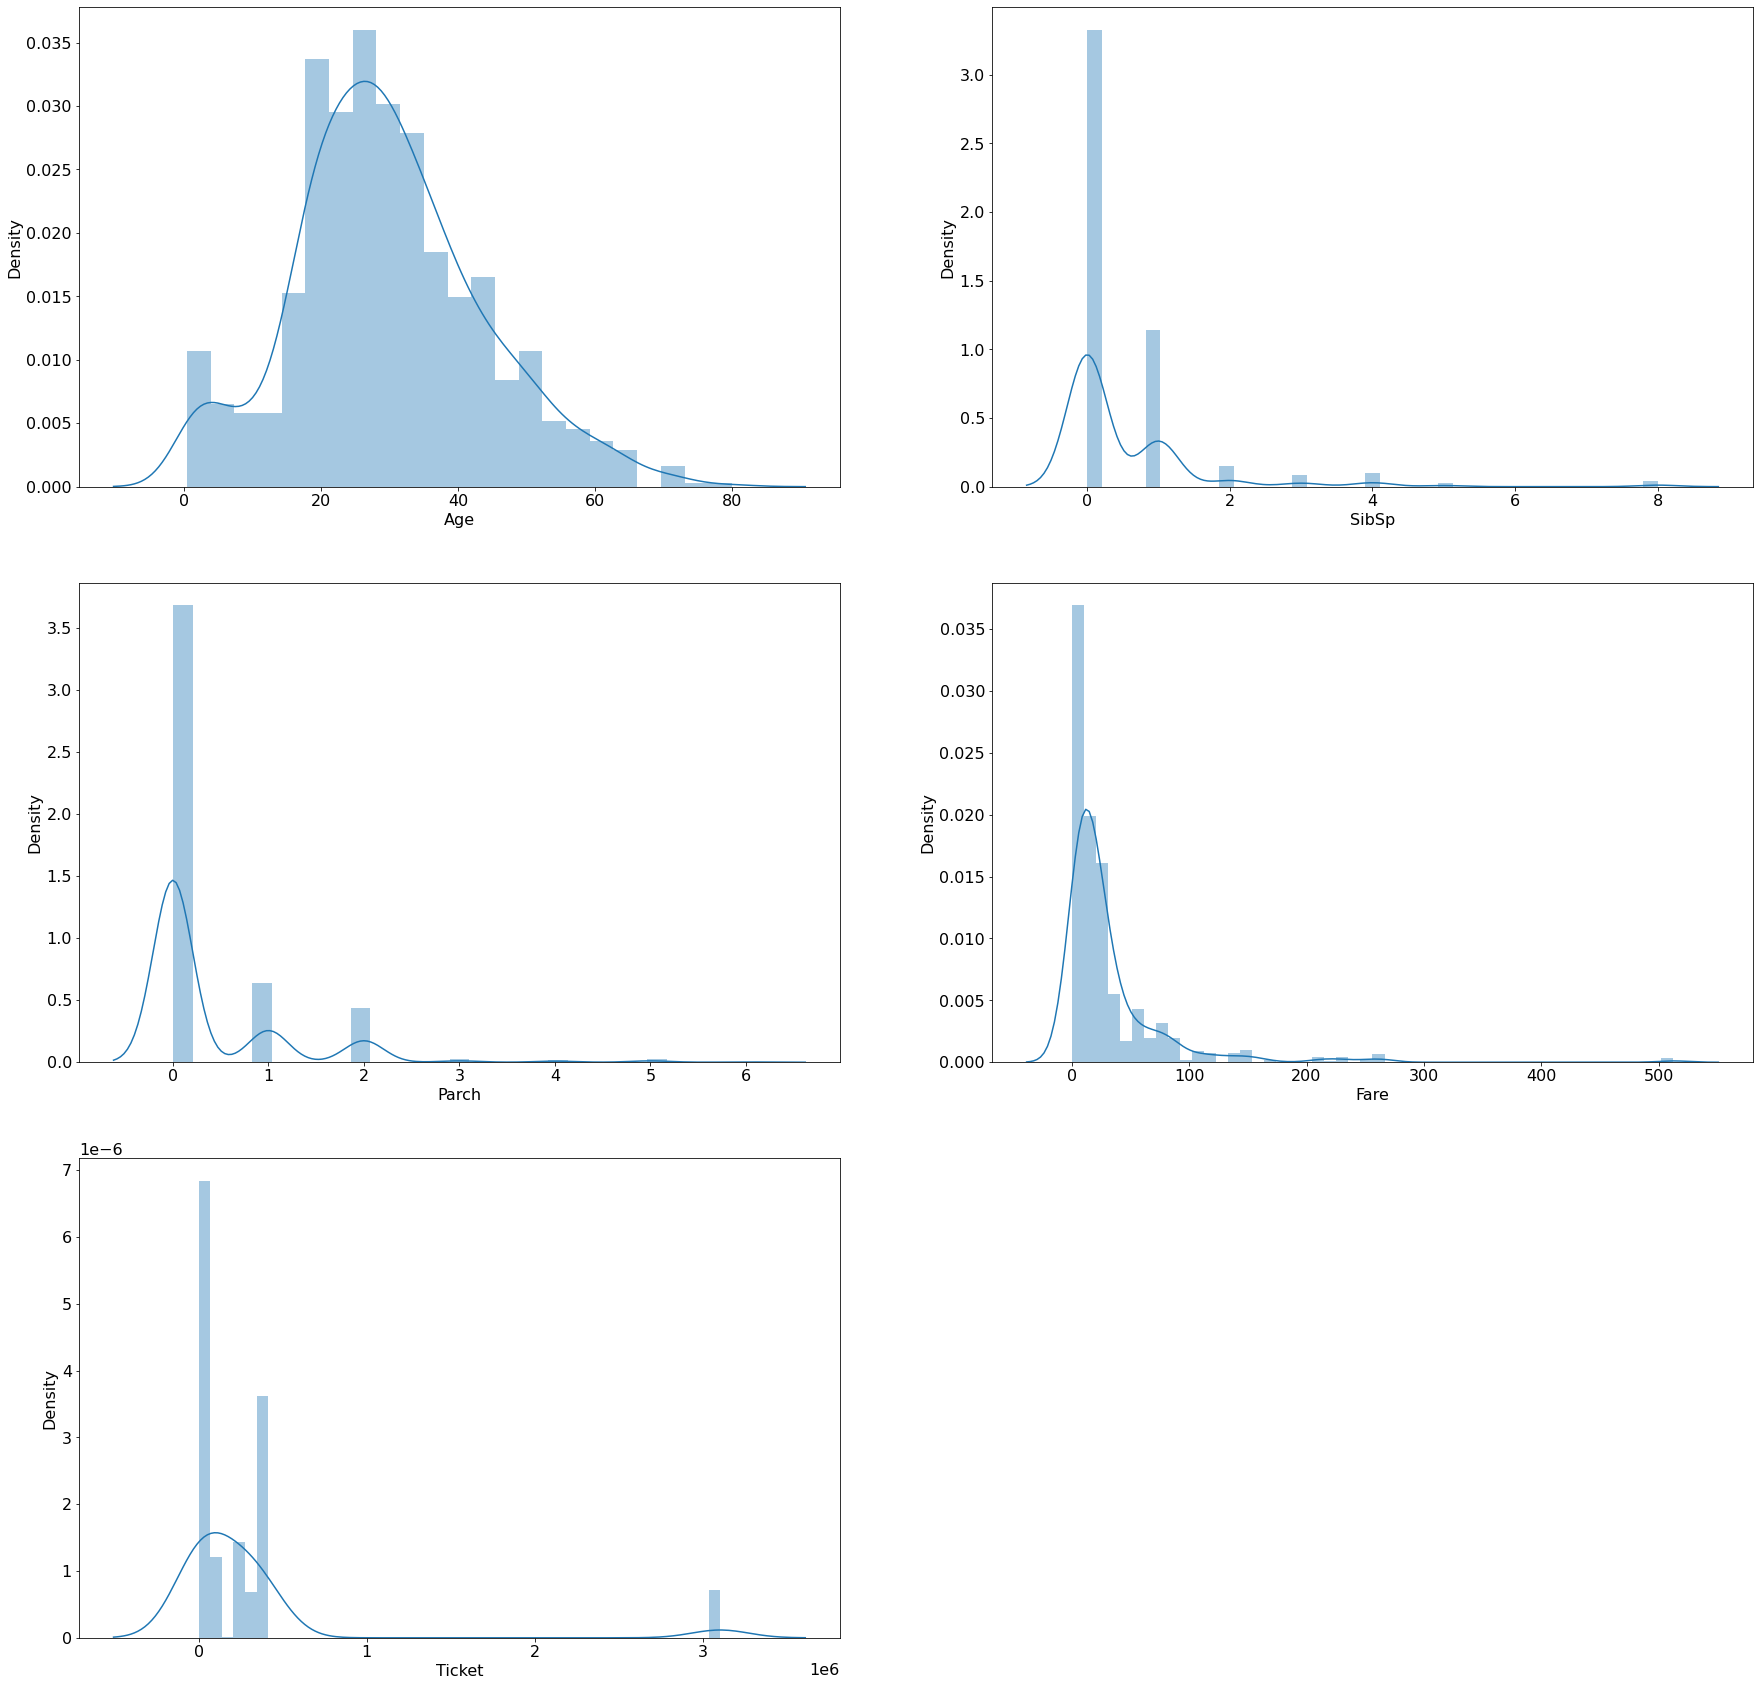

In [12]:
plt.figure(figsize=(30,30))
i = 1
for col in numerical_features:
    plt.subplot(3,2,i)
    i = i + 1
    ax = sns.distplot(df[col])
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    #ax.set_xlim([df[col].quantile(0.25) - 1.45*IQR,df[col].quantile(0.75) + 1.45*IQR])

In [13]:
df['Fare'] = np.log(df['Fare']+1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

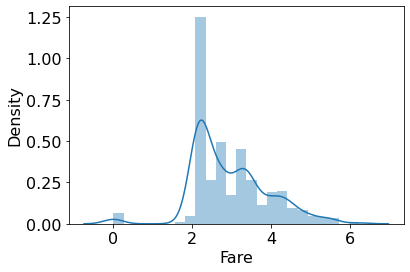

In [14]:
sns.distplot(df['Fare'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ticket', ylabel='Density'>

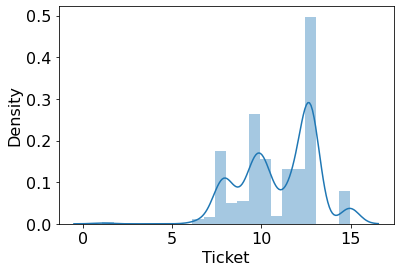

In [15]:
df['Ticket'] = np.log(df['Ticket'])
sns.distplot(df['Ticket'])

In [16]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

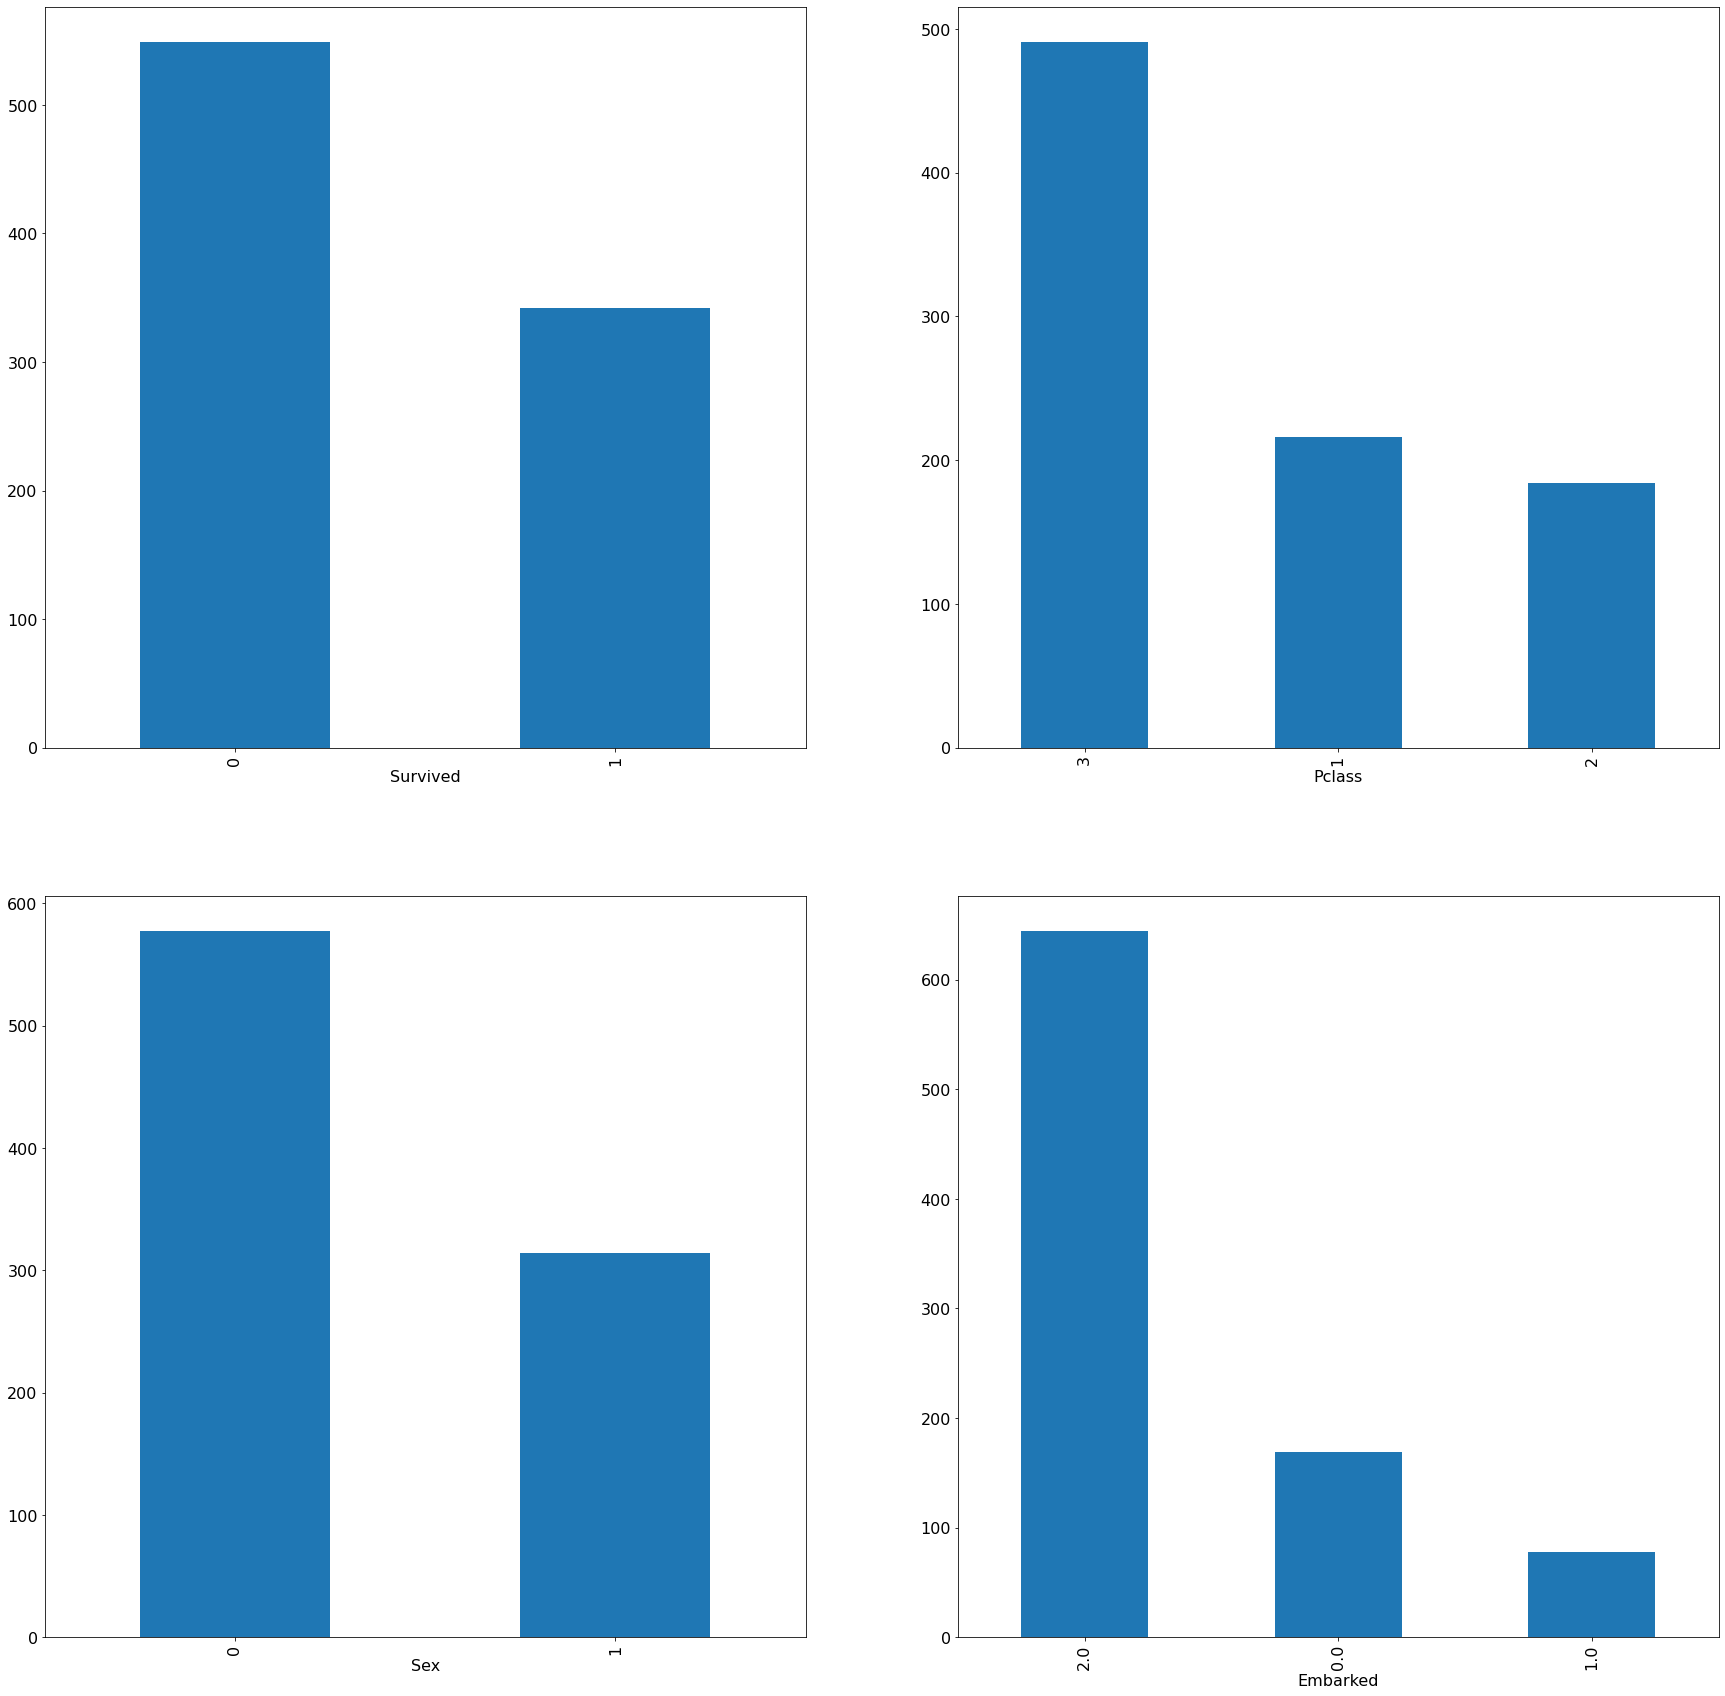

In [17]:
i = 1
plt.figure(figsize=(30,30))
for col in categorical_features:
    plt.subplot(2,2,i)
    i = i + 1
    df_box = df[col].value_counts()
    df_box.plot.bar()
    plt.xlabel(col)
    

In [18]:
for col in categorical_features:
    if(col!='Survived'):
        print(df.pivot_table(index='Survived',columns=col,aggfunc='count')['Age'])

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex         0    1
Survived          
0         468   81
1         109  233
Embarked  0.0  1.0  2.0
Survived               
0          75   47  427
1          94   31  217


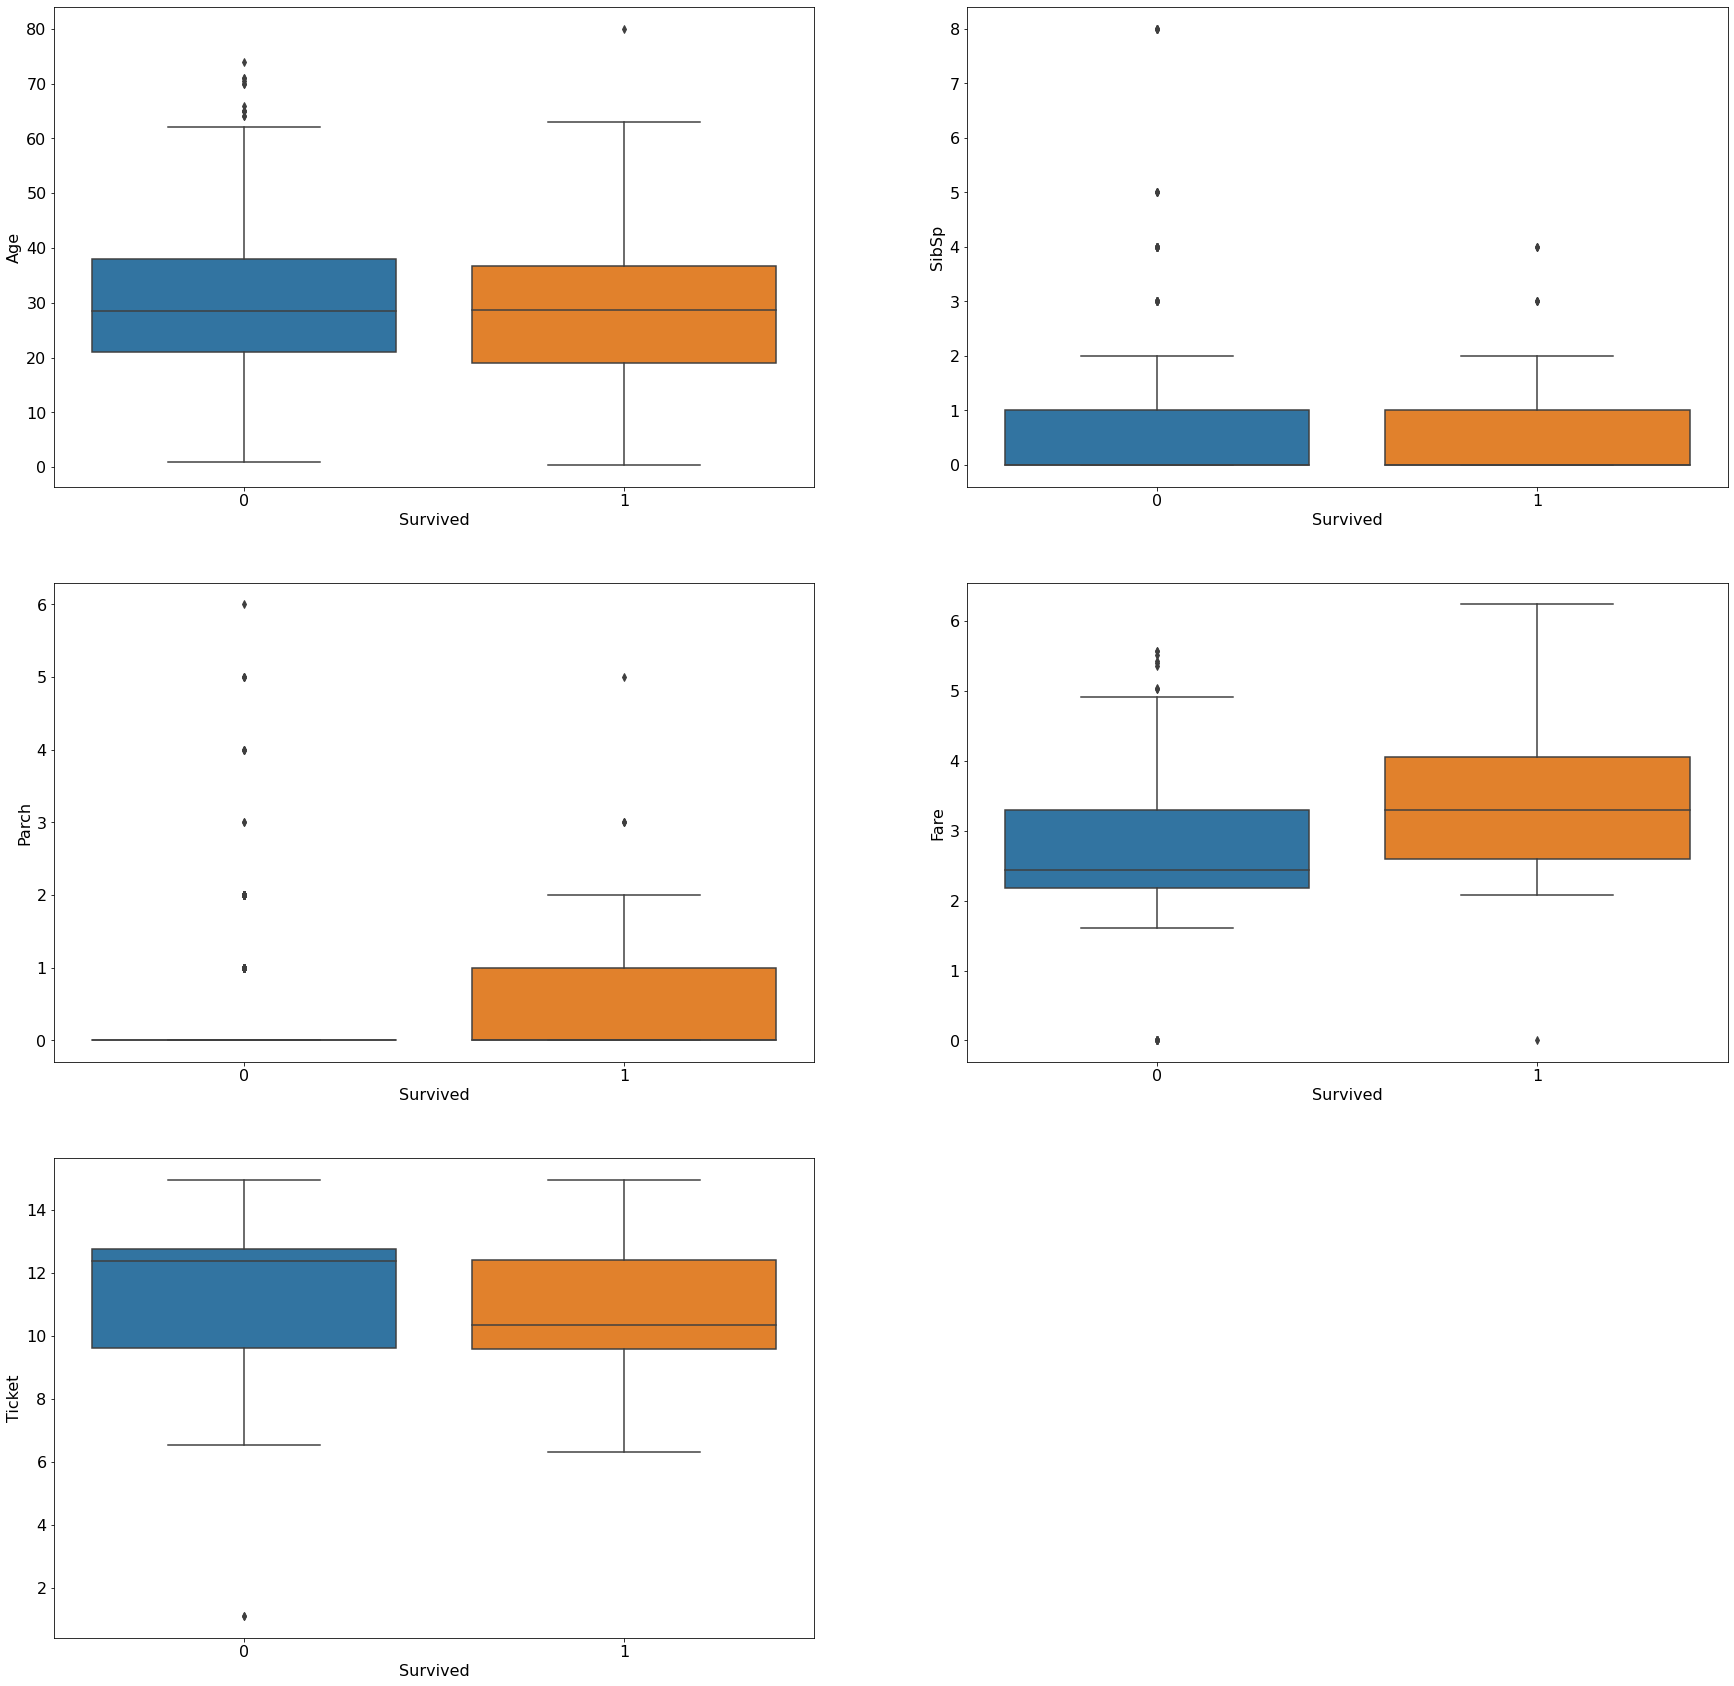

In [19]:
i = 1
plt.figure(figsize=(30,30))
for col in numerical_features:
    plt.subplot(3,2,i)
    i = i + 1
    sns.boxplot(x=df['Survived'],y=df[col])

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,9.960388,2.110213,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,9.775597,4.280593,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,14.947326,2.188856,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,11.642224,3.990834,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,12.830539,2.202765,NaN,2.0


In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = df[['Pclass','Sex','Embarked','Parch','Fare','Age','SibSp','Ticket']]
y = df['Survived']
x = ss.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix,classification_report
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=10)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       432
           1       0.76      0.70      0.73       280

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.79      0.80      0.79       712

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.73      0.76      0.75        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



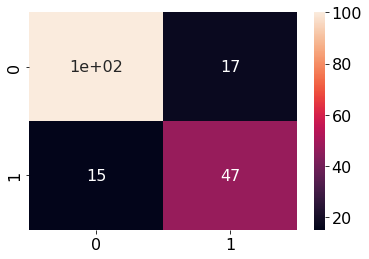

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot = True)
print(classification_report(y_train,lr.predict(x_train)))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       432
           1       0.68      0.78      0.72       280

    accuracy                           0.77       712
   macro avg       0.76      0.77      0.76       712
weighted avg       0.77      0.77      0.77       712

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       117
           1       0.62      0.77      0.69        62

    accuracy                           0.76       179
   macro avg       0.74      0.76      0.75       179
weighted avg       0.78      0.76      0.76       179



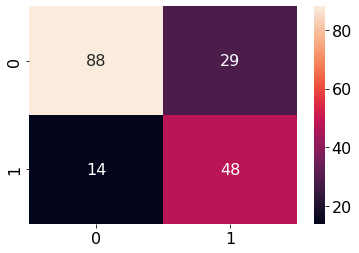

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot = True)
print(classification_report(y_train,nb.predict(x_train)))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       432
           1       0.75      0.68      0.71       280

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.78      0.79      0.78       712

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



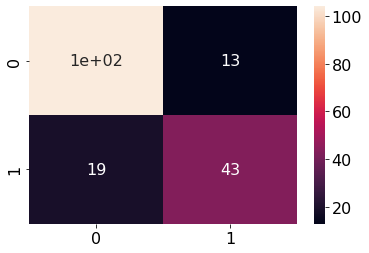

In [25]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss = 'modified_huber',shuffle=True,random_state=101)
sgdc.fit(x_train,y_train)
y_pred = sgdc.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot = True)
print(classification_report(y_train,sgdc.predict(x_train)))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       432
           1       0.83      0.77      0.80       280

    accuracy                           0.85       712
   macro avg       0.85      0.84      0.84       712
weighted avg       0.85      0.85      0.85       712

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



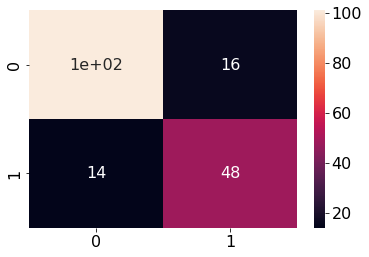

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred = knc.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot = True)
print(classification_report(y_train,knc.predict(x_train)))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       432
           1       0.85      0.71      0.78       280

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       117
           1       0.79      0.74      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



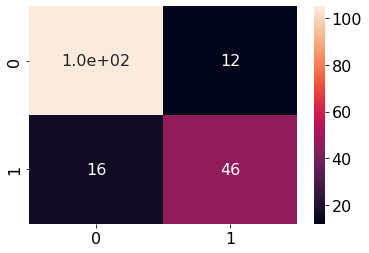

In [27]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot = True)
print(classification_report(y_train,svc.predict(x_train)))
print(classification_report(y_test,y_pred))

In [28]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(svc,{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4,5]},cv=5,scoring='f1_macro')
gsv.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': [1, 2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1_macro')

In [29]:
print(gsv.best_score_)
print(gsv.best_params_)

0.8004591463204729
{'degree': 1, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       432
           1       0.92      0.82      0.87       280

    accuracy                           0.90       712
   macro avg       0.91      0.89      0.90       712
weighted avg       0.90      0.90      0.90       712

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       117
           1       0.76      0.71      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



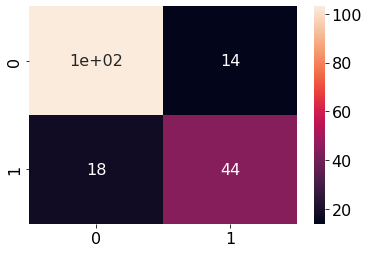

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=7,random_state=101)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot = True)
print(classification_report(y_train,dtc.predict(x_train)))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       432
           1       1.00      0.91      0.95       280

    accuracy                           0.96       712
   macro avg       0.97      0.96      0.96       712
weighted avg       0.97      0.96      0.96       712

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       117
           1       0.86      0.81      0.83        62

    accuracy                           0.89       179
   macro avg       0.88      0.87      0.87       179
weighted avg       0.89      0.89      0.89       179



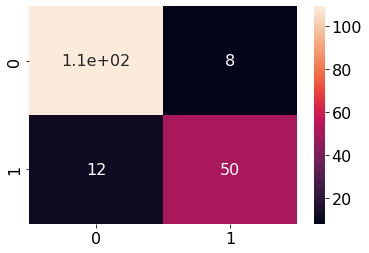

In [31]:
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(max_depth=10,random_state=101,n_estimators=500)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot = True)
print(classification_report(y_train,dtc.predict(x_train)))
print(classification_report(y_test,y_pred))

In [32]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(dtc,{'max_depth':[13,15,17,20],'n_estimators':[100,300,500]},cv=5,scoring='f1_macro')
gsv.fit(x,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=500,
                                              random_state=101),
             param_grid={'max_depth': [13, 15, 17, 20],
                         'n_estimators': [100, 300, 500]},
             scoring='f1_macro')

In [33]:
print(gsv.best_score_)
print(gsv.best_params_)

0.8229875391892275
{'max_depth': 15, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00       280

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       117
           1       0.78      0.79      0.78        62

    accuracy                           0.85       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.85      0.85       179



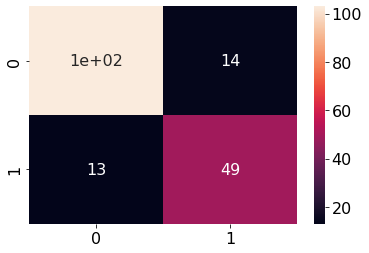

In [34]:
dtc = RandomForestClassifier(max_depth=15,random_state=101,n_estimators=300)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot = True)
print(classification_report(y_train,dtc.predict(x_train)))
print(classification_report(y_test,y_pred))

In [35]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test['Sex'].replace(['male','female'],[0,1],inplace=True)
df_test['Embarked'].replace(['C','Q','S'],[0,1,2],inplace=True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [37]:
ticket_arr = np.zeros((df_test.shape[0]))
for i in range(df_test['Ticket'].shape[0]):
    if type(df_test['Ticket'][i]) == np.float64:
        ticket_arr[i] = df_test.iloc[i,7]
    else:
        str_list = df_test.iloc[i,7].split()
        try:
            ticket_arr[i] = float(str_list[-1])
        except:
            ticket_arr[i] = np.NaN
df_test['Ticket'] = pd.Series(ticket_arr)
df_test['Ticket'] = (df_test['Ticket'].ffill() + df_test['Ticket'].bfill())/2

In [38]:
df_test['Age'] = (df_test['Age'].ffill() + df_test['Age'].bfill())/2
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [39]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    float64
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 36.0+ KB


In [41]:
df_test['Ticket'] = np.log(df_test['Ticket'])
df_test['Fare'] = np.log(df_test['Fare']+1)

In [42]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,12.709605,2.178064,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,12.802907,2.079442,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,12.389544,2.369075,NaN,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,12.660817,2.268252,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,14.947331,2.586824,NaN,2


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    float64
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 36.0+ KB


In [44]:
x_sub = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Ticket']]
x_sub = ss.fit_transform(x_sub)
y_sub = dtc.predict(x_sub)
print(y_sub)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [45]:
df_sub = pd.DataFrame(y_sub,columns=['Survived'])
df_sub = pd.concat([df_test['PassengerId'],df_sub['Survived']],axis=1)
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
df_sample = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df_sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
df_sub.to_csv('Submission.csv',index=False)